## Publishing Apps with Streamlit Cloud

Streamlit provides free hosting for your streamlit apps. In this section, we will now learn how to deploy an app to Streamlit cloud and configure it correctly.

### Upload the app to GitHub

To run your app on Streamlit Cloud, you need to upload your app to GitHub. Streamlit supports both private and public repositories. I'm going to use the Karnataka Highways app created in [NoteBook 13](https://github.com/Stephen137/Mapping_and_data_viz_with_Python/blob/main/13_building_mapping_apps_with_leafmap_and_streamlit.ipynb). 

`indian_highways_app.py`

In [ ]:
import streamlit as st
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import leafmap.foliumap as leafmap

# Cosmetic config
st.set_page_config(page_title='Dashboard', layout='wide')

st.title('Karnataka State, India - District Highways Dashboard')

st.sidebar.title('About')
st.sidebar.info('Explore the Karnataka State Highways. NH=National Highway, SH=State Highway')

# Concatenate file names
data_url = 'https://storage.googleapis.com/spatialthoughts-public-data/python-dataviz/osm/'
gpkg_file = 'karnataka.gpkg'
csv_file = 'highway_lengths_by_district.csv'


@st.cache_data
# custom funciton to load in our spatial data
def read_gdf(url, layer):
    gdf = gpd.read_file(url, layer=layer)
    return gdf

@st.cache_data
# custom function to load road statistics
def read_csv(url):
    df = pd.read_csv(url)
    return df

# Concatenate file names
gpkg_url = data_url + gpkg_file
csv_url = data_url + csv_file


# create districts GeoDataFrame
districts_gdf = read_gdf(gpkg_url, 'karnataka_districts')

# create roads GeoDataFrame
roads_gdf = read_gdf(gpkg_url, 'karnataka_highways')

# create non spatial road stats DataFrame
lengths_df = read_csv(csv_url)

# Add a dropdown for district selection and filter dataset based on user choice
districts = districts_gdf.DISTRICT.values
district = st.sidebar.selectbox('Select a District', districts)

# Give the user option to addd a road overlay
overlay = st.sidebar.checkbox('Overlay roads')

# filter road lengths based on user district choice
district_lengths = lengths_df[lengths_df['DISTRICT'] == district]

# # Visualize the user selection using barchart
fig, ax = plt.subplots(1, 1)
district_lengths.plot(kind='bar', ax=ax, color=['blue', 'red'],
    ylabel='Kilometers', xlabel='Category')
ax.get_xaxis().set_ticklabels([])
stats = st.sidebar.pyplot(fig)

# Create a Folium map
m = leafmap.Map(
    layers_control=True,
    draw_control=False,
    measure_control=False,
    fullscreen_control=False,
)

# Add basemap
m.add_basemap('CartoDB.DarkMatter')

# Add districts layer
m.add_gdf(
    gdf=districts_gdf,
    zoom_to_layer=False,
    layer_name='districts',
    info_mode='on_click',
    style={'color': '#7fcdbb', 'fillOpacity': 0.3, 'weight': 0.5},
    )

# add roads layer if selected by user
if overlay:
    m.add_gdf(
        gdf=roads_gdf,
        zoom_to_layer=False,
        layer_name='highways',
        info_mode=None,
        style={'color': '#225ea8', 'weight': 1.5},
    )

# filter for user district selection
selected_gdf = districts_gdf[districts_gdf['DISTRICT'] == district]

# add the user selected districts layer
m.add_gdf(
    gdf=selected_gdf,
    layer_name='selected',
    zoom_to_layer=True,
    info_mode=None,
    style={'color': 'yellow', 'fill': None, 'weight': 2}
 )

m_streamlit = m.to_streamlit(600, 600)

### Add App dependencies

If your app needs a third-party Python package, you need to add it in a separate file called `requirements.txt`. The packages listed in the file will be installed on Streamlit Cloud before running the app.

For our app, we have created the `requirements.txt` file with the following content and uploaded it to GitHub in the same directory as the `app.py`.

`requirements.txt`

In [ ]:
streamlit
folium
streamlit-folium

You may also specify other dependencies for your app. Learn more at [App dependencies](https://docs.streamlit.io/streamlit-cloud/get-started/deploy-an-app/app-dependencies) documentation.

### Replace Sensitive Data with Secrets

It is not a good practice to store API keys or passwords in the code as it can be seen by others and can be misused. Streamlit provides an easy way for [Secrets Management](https://docs.streamlit.io/streamlit-cloud/get-started/deploy-an-app/connect-to-data-sources/secrets-management). You can store any `key=value` pairs in a separate location and access it in the app using `st.secrets`.

While doing local development, you create a folder named `.streamlit` in the app directory and store any `key=value` pairs in a file named `secrets.toml`. For example, if you want to store the ORS API Key, you can create a new file `secrets.toml` in the `.streamlit directory` with the following content. (Replace <your api key> with the actual key).

In [ ]:
'ORS_API_KEY' = '<your api key>'

Once done, the value of the ORS_API_KEY can be retrieved in the streamlit app using `st.secrets['ORS_API_KEY']`. While deploying the app, you can configure your secrets as outlined in the next section.

### Deploy your App

Now you are ready to deploy your app to Streamlit Cloud.

1. Visit [Streamlit Cloud](https://streamlit.io/cloud) and sign-in. If you do not have an account, you can click *Sign-up* and create a new account. Once logged-in, click the *New app* button.

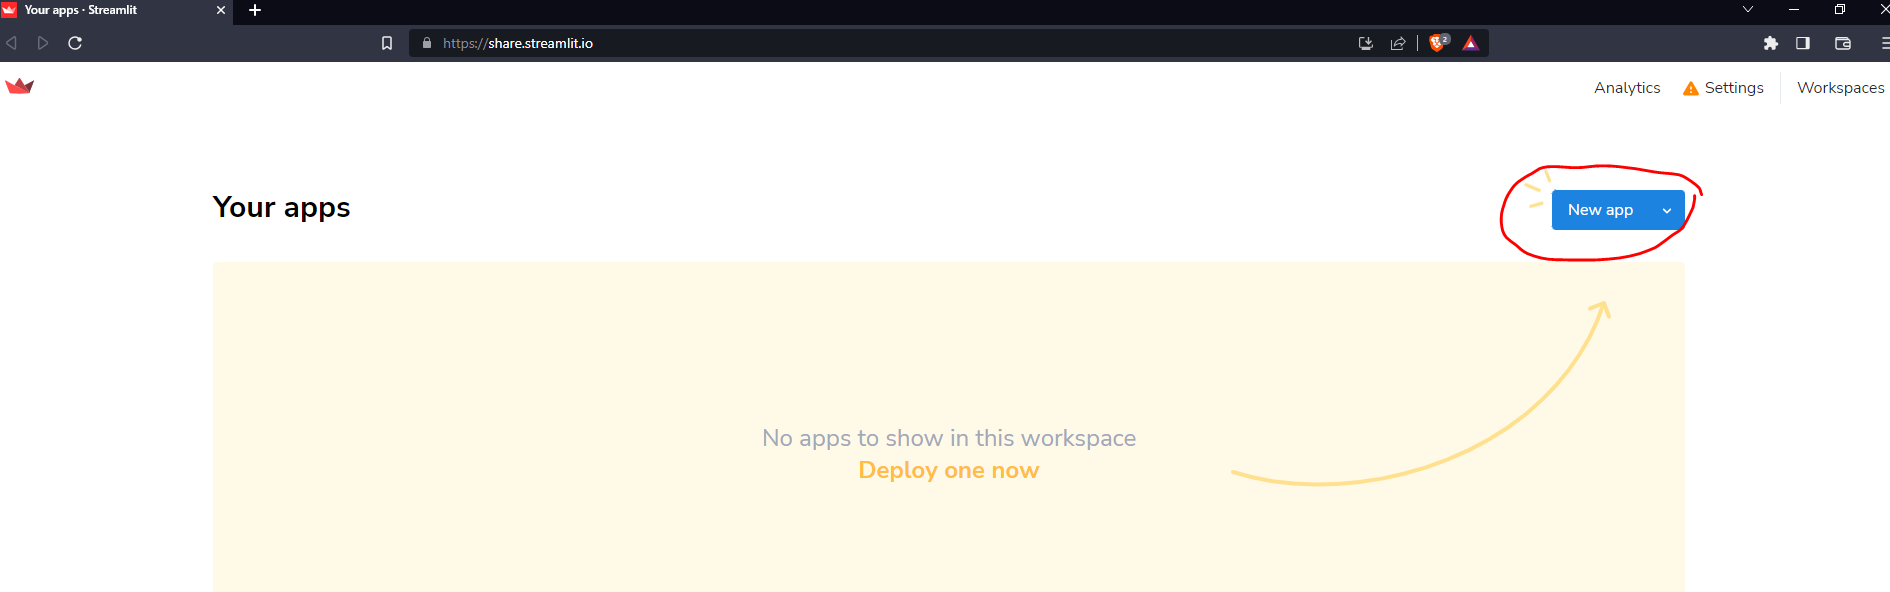

2. Click Paste GitHub URL and paste the URL to your streamlit app.py file. For my example, this is `indian_highways_app.py` but you shouls select you own.  Next, click *Advanced settings* :

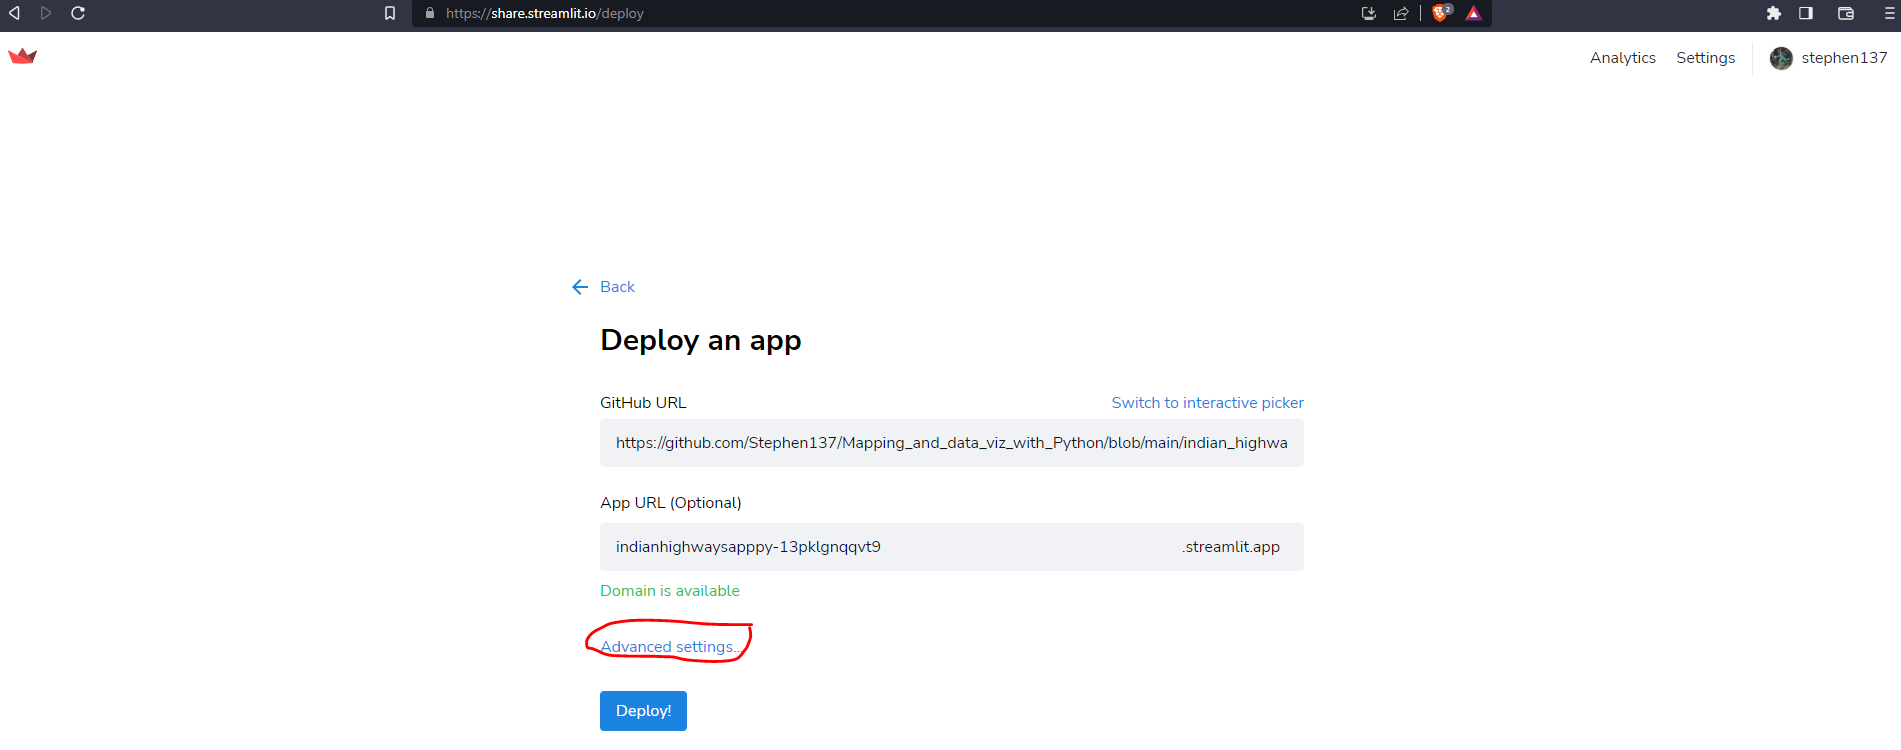

3. This dialog allows you to store your private information required by your apps, such as API keys, username/password for your database, etc. For my example I don't require to enter anything, however if your app does require an API key, then you need to enter the API Key in the following format and replace with your actual API key. Click Save.

In [ ]:
'ORS_API_KEY' = '<your key>'

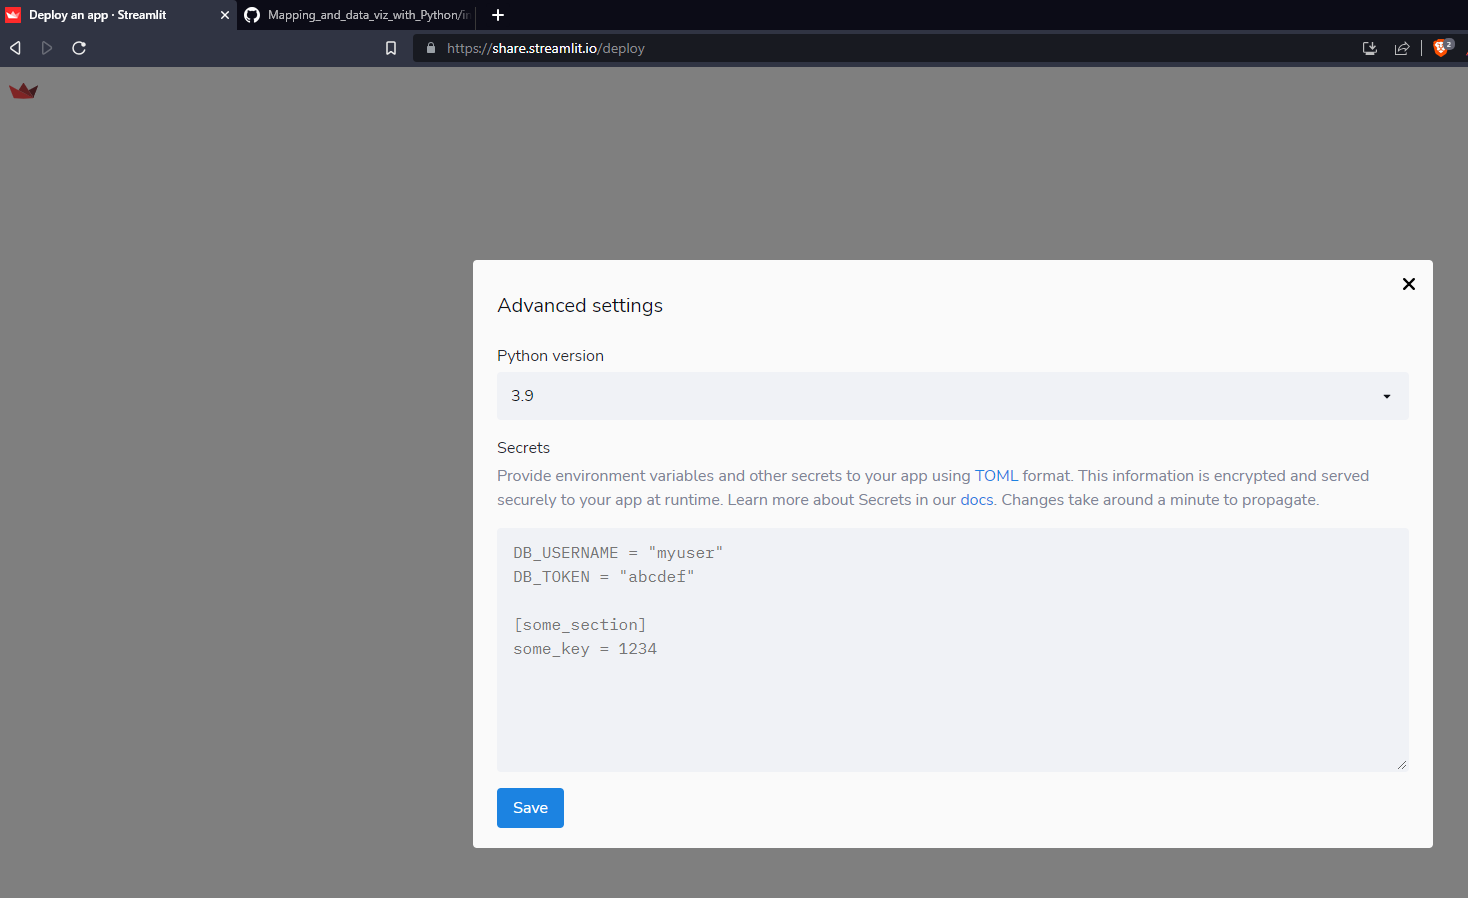

4. You are now ready to deploy the app. Click *Deploy!* 

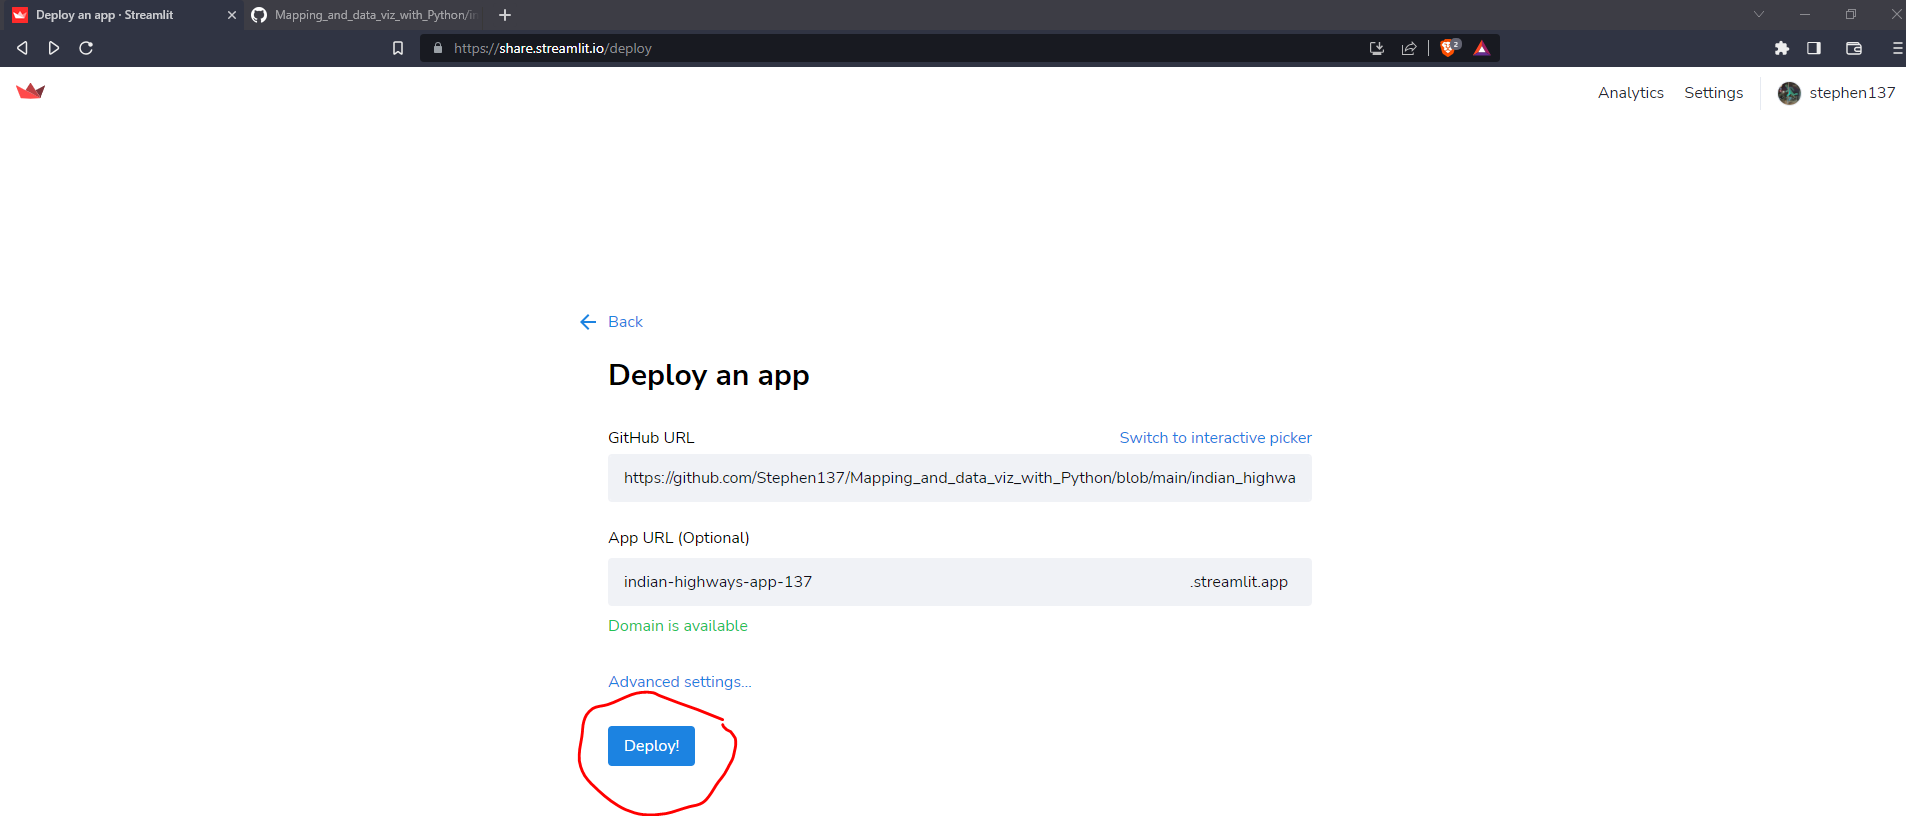

5. Your app will now be deployed and will be accessible via the provided URL. You can visit your Dashboard to manage the app once it is deployed.

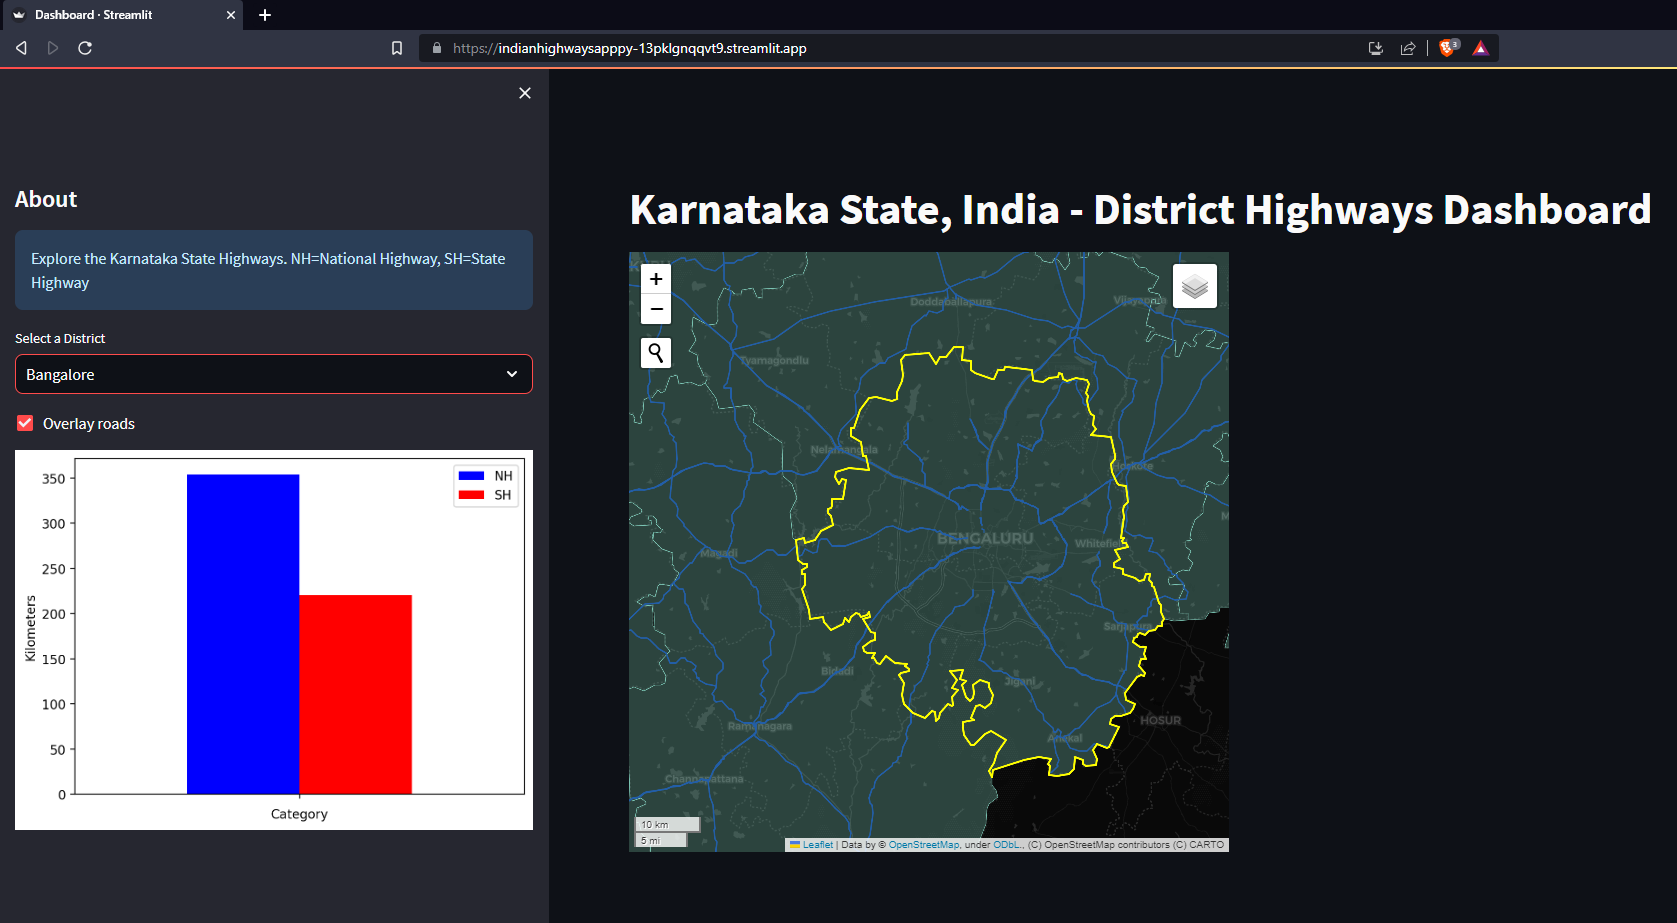

The app is now live! Visit the [Indian Highways app](https://indianhighwaysapppy-13pklgnqqvt9.streamlit.app/) to see it in action.